In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# Описание работы
## Классификация доходов
Датасет содержит набор данных о индивидуальном доходе, демографических и некоторых финансовых параметрах физических лицах компании, выдающей субсидии.
Задачей классификации для данного датасета является определение доходов физ.лиц за счет уменьшения кол-ва переменных для изучения, не жертвуя большой точностью, с целью упрощения планирования компанией расходов на субсидии.

# 1. Загрузка данных 

In [2]:
dataset = "income.csv"
data_raw = pd.read_csv(dataset)
data_raw.shape

(31978, 13)

# 2 Подготовка данных
Целевой категориальный признак `SalStat` приведем к бинарному виду, заменив "less than or equal to 50,000" на `0`, а "greater than 50,000" на `1`.

In [3]:
data_raw["SalStat"] = np.where(data_raw["SalStat"] == " less than or equal to 50,000", 0, 1)

Избавимся от категориальных признаков с помощью метода бинаризации.

In [4]:
data_raw["JobType"] = data_raw["JobType"].astype("category")
data_raw["EdType"] = data_raw["EdType"].astype("category")
data_raw["maritalstatus"] = data_raw["maritalstatus"].astype("category")
data_raw["occupation"] = data_raw["occupation"].astype("category")
data_raw["relationship"] = data_raw["relationship"].astype("category")
data_raw["race"] = data_raw["race"].astype("category")
data_raw["gender"] = data_raw["gender"].astype("category")
data_raw["nativecountry"] = data_raw["nativecountry"].astype("category")

data_raw = pd.get_dummies(data_raw, drop_first=True)
print(data_raw.shape)
data_raw.head()

(31978, 98)


,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Пропущенных значений в датасете нет.

In [5]:
data_raw.isna().sum()

age                               0
capitalgain                       0
capitalloss                       0
hoursperweek                      0
SalStat                           0
                                 ..
nativecountry_ Thailand           0
nativecountry_ Trinadad&Tobago    0
nativecountry_ United-States      0
nativecountry_ Vietnam            0
nativecountry_ Yugoslavia         0
Length: 98, dtype: int64

Проведем нормализацию количественных признаков.

In [6]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,...,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,0.295603,0.010644,0.019913,0.402223,0.240634,0.029489,0.064638,0.000219,0.696917,0.033586,...,0.001157,0.003565,0.000375,0.002502,0.001595,0.000563,0.000594,0.912190,0.002095,0.000500
std,0.187152,0.072987,0.092193,0.125972,0.427475,0.169175,0.245890,0.014794,0.459598,0.180163,...,0.033996,0.059602,0.019368,0.049955,0.039904,0.023719,0.024369,0.283023,0.045726,0.022363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.273973,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.424658,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Выбор тестовой и обучающей выборки

In [7]:
X = data_normal.drop(["SalStat"], 1)
y = data_normal["SalStat"]

print(X.shape)
print(y.shape)

(31978, 97)
(31978,)


Разабьем данные на обучающую и тестовую выборки:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(21425, 10553)

# 4. Подбор гиперпараметров

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 4.1 Подбор количества нейронов в однослойной сети

In [10]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in hidden_layer_size:
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                        solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Train: Min error=0.09619603267211202, number of neurons=200
Test: Min error=0.1482990618781389, number of neurons=10


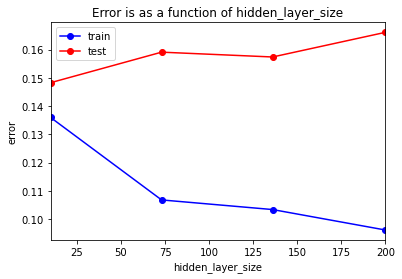

In [11]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=0.903803967327888, number of neurons=200
Test: max accuracy=0.8517009381218611, number of neurons=10


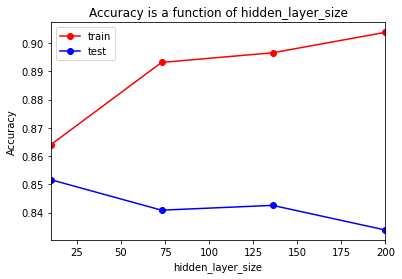

In [12]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

# 4.2 Подбор количества нейронов в двуслойной сети

In [13]:
n = 4
hidden_layer_size = np.linspace(10, 200, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in enumerate(hidden_layer_size):
    for j, size_2 in enumerate(hidden_layer_size):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

Train: Min error=0.055215869311551924, number of neurons=200,200
Test: Min error=0.1500047379891974, number of neurons=10,10


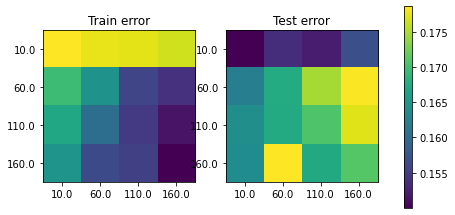

In [14]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(10, 200, 200 / n))
plt.yticks(np.arange(n), np.arange(10, 200, 200 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err) // n],
        hidden_layer_size[np.argmin(train_err) % n]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err) // n],
        hidden_layer_size[np.argmin(test_err) % n]))

Train: Max accuracy=0.944784130688448, number of neurons=200,200
Test: Max accuracy=0.8499952620108027, number of neurons=10,10


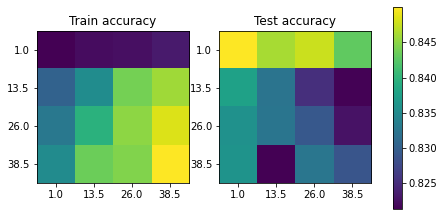

In [15]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc) // n],
        hidden_layer_size[np.argmax(train_acc) % n]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc) // n],
        hidden_layer_size[np.argmax(test_acc) % n]))

# 4.3 Подбор параметра регуляризации

In [16]:
alphas = np.logspace(-3, 2, 5)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in alphas:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,10,), 
                            solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

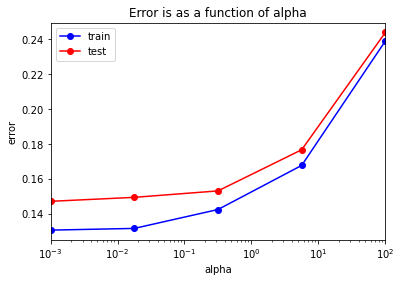

In [17]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

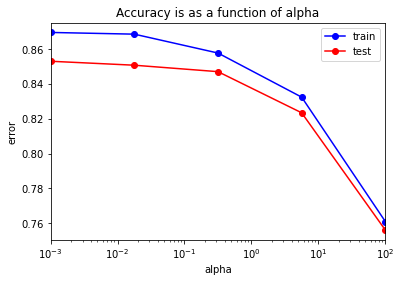

In [18]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

# 5. Выводы

## 5.1 Подбор числа нейронов в однослойной моделе

   * За оптимальный размер скрытого слоя возьмем 10 нейронов. (accuracy=0.85)
   * При увеличение количества нейронов можем наблюдать переобучение модели.

## 5.2 Подбор числа нейронов в двуслойной моделе

   * За оптимальный размер скрытых слоев возьмем 10 и 10 нейронов. (accuracy=0.84)
   * Можем заметить, что при добавление второго скрытого слоя точность уменьшилась, следовательно для решения задачи будет достаточно однослойной сети
   * Так же как и в подборе однослойной модели в двуслойной модели с ростом количества нейронов наблюдается переобучение.

## 5.3 Подбор параметра регуляризации

   * При выборе параметра регуляризации переобучения не наблюдается.
   * При lambda > 10e-3 начинается рост ошибки и снижение accuracy. То есть с ростом lamda уменьшаются веса модели и стремятся к нулю.

